In [272]:
import pandas as pd #used for handling the dataset
import numpy as np #used for handling numbers
from sklearn.impute import SimpleImputer #used for handling missing data
from scipy import stats #for t-test
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder #used for encoding categorical data
#from sklearn.model_selection import train_test_split #used for splitting training and testing data
#from sklearm.preprocessing import StandardScaler #used for feature scaling

The dataset (forest) for finding out the forest land amount in 246 countries from 1990 to 2020. 

In [36]:
forest = pd.read_csv('FAOSTAT.csv')
print(forest.head())

  Domain Code    Domain  Area Code (M49)         Area  Element Code Element  \
0          RL  Land Use                4  Afghanistan          5110    Area   
1          RL  Land Use                4  Afghanistan          5110    Area   
2          RL  Land Use                4  Afghanistan          5110    Area   
3          RL  Land Use                4  Afghanistan          5110    Area   
4          RL  Land Use                4  Afghanistan          5110    Area   

   Item Code         Item  Year Code  Year     Unit    Value Flag  \
0       6602  Agriculture       1990  1990  1000 ha  38040.0    I   
1       6602  Agriculture       1991  1991  1000 ha  38030.0    I   
2       6602  Agriculture       1992  1992  1000 ha  38030.0    I   
3       6602  Agriculture       1993  1993  1000 ha  37934.0    I   
4       6602  Agriculture       1994  1994  1000 ha  37813.0    I   

  Flag Description  
0    Imputed value  
1    Imputed value  
2    Imputed value  
3    Imputed value  
4    

In [37]:
print(forest["Item"].unique())
print("number of unique Domain: ", forest["Item"].nunique())
print(forest["Year"].unique())
print("number of unique Domain. year: ", forest["Year"].nunique())

print("number of unique Domain, area: ", forest["Area"].nunique())

['Agriculture' 'Agricultural land' 'Cropland' 'Forest land'
 'Naturally regenerating forest' 'Planted Forest']
number of unique Domain:  6
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020]
number of unique Domain. year:  31
number of unique Domain, area:  246


In [86]:
#dropping unnecessary columns
forest_new=forest.drop(columns = ["Flag Description","Flag" ])
forest_new.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,RL,Land Use,4,Afghanistan,5110,Area,6602,Agriculture,1990,1990,1000 ha,38040.0
1,RL,Land Use,4,Afghanistan,5110,Area,6602,Agriculture,1991,1991,1000 ha,38030.0
2,RL,Land Use,4,Afghanistan,5110,Area,6602,Agriculture,1992,1992,1000 ha,38030.0
3,RL,Land Use,4,Afghanistan,5110,Area,6602,Agriculture,1993,1993,1000 ha,37934.0
4,RL,Land Use,4,Afghanistan,5110,Area,6602,Agriculture,1994,1994,1000 ha,37813.0


In [87]:
# to check if there is any missing value in a column
forest_new.isnull().Value.any()
forest_new.isnull().Year.any()

False

The output shows there is no missing value in the dataset. so no need to alter anything. 

In [88]:
#to check if there is any duplicate value exist; output shows none
forest_new.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
47596    False
47597    False
47598    False
47599    False
47600    False
Length: 47601, dtype: bool

MEAN

In [164]:
#filtering through columns and rows
forest_newn=forest_new[forest_new["Year"]==2001]
forest_new1=forest_newn[forest_newn["Item"]=="Agricultural land"]
forest_new1.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
42,RL,Land Use,4,Afghanistan,5110,Area,6610,Agricultural land,2001,2001,1000 ha,37753.00
228,RL,Land Use,8,Albania,5110,Area,6610,Agricultural land,2001,2001,1000 ha,1139.00
414,RL,Land Use,12,Algeria,5110,Area,6610,Agricultural land,2001,2001,1000 ha,40109.00
631,RL,Land Use,16,American Samoa,5110,Area,6610,Agricultural land,2001,2001,1000 ha,5.92
848,RL,Land Use,20,Andorra,5110,Area,6610,Agricultural land,2001,2001,1000 ha,22.75


In [167]:
#the mean of the agricultural land worldwide in 2001
print("the mean of the agricultural land worldwide for year 2001: ", forest_new1["Value"].mean())

the mean of the agricultural land worldwide for year 2001:  23913.90411504425


In [170]:
#filtering through columns and rows
forest_newn=forest_new[forest_new["Year"]==2020]
forest_new2=forest_newn[forest_newn["Item"]=="Agricultural land"]
forest_new2.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
61,RL,Land Use,4,Afghanistan,5110,Area,6610,Agricultural land,2020,2020,1000 ha,38356.00
247,RL,Land Use,8,Albania,5110,Area,6610,Agricultural land,2020,2020,1000 ha,1165.56
433,RL,Land Use,12,Algeria,5110,Area,6610,Agricultural land,2020,2020,1000 ha,41358.85
650,RL,Land Use,16,American Samoa,5110,Area,6610,Agricultural land,2020,2020,1000 ha,4.01
867,RL,Land Use,20,Andorra,5110,Area,6610,Agricultural land,2020,2020,1000 ha,18.72


In [172]:
#the mean of the agricultural land worldwide in 2020
print("the mean of the agricultural land worldwide for year 2020: ", forest_new2["Value"].mean())

the mean of the agricultural land worldwide for year 2020:  23228.932378854628


We can see a slight decline in the mean of agricultural land in 2020 from 2001

In [380]:
#filtering through columns and rows
forest_newn=forest_new[forest_new["Year"]==2001]
array = ['Forest land','Naturally regenerating forest','Planted Forest']
forest_new3=forest_newn.loc[forest_newn['Item'].isin(array)]
forest_new3.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
104,RL,Land Use,4,Afghanistan,5110,Area,6646,Forest land,2001,2001,1000 ha,1208.44
135,RL,Land Use,4,Afghanistan,5110,Area,6717,Naturally regenerating forest,2001,2001,1000 ha,1208.44
166,RL,Land Use,4,Afghanistan,5110,Area,6716,Planted Forest,2001,2001,1000 ha,0.00
290,RL,Land Use,8,Albania,5110,Area,6646,Forest land,2001,2001,1000 ha,770.58
321,RL,Land Use,8,Albania,5110,Area,6717,Naturally regenerating forest,2001,2001,1000 ha,711.68


In [214]:
#the mean of the agricultural land worldwide in 2020
print("the mean of the forest land worldwide for year 2001: ", forest_new3["Value"].mean())

the mean of the forest land worldwide for year 2001:  10375.270902777776


In [215]:
#filtering through columns and rows
forest_newn=forest_new[forest_new["Year"]==2020]
array = ['Forest land','Naturally regenerating forest','Planted Forest']
forest_new4=forest_newn.loc[forest_newn['Item'].isin(array)]
forest_new4.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
123,RL,Land Use,4,Afghanistan,5110,Area,6646,Forest land,2020,2020,1000 ha,1208.44
154,RL,Land Use,4,Afghanistan,5110,Area,6717,Naturally regenerating forest,2020,2020,1000 ha,1208.44
185,RL,Land Use,4,Afghanistan,5110,Area,6716,Planted Forest,2020,2020,1000 ha,0.00
309,RL,Land Use,8,Albania,5110,Area,6646,Forest land,2020,2020,1000 ha,788.90
340,RL,Land Use,8,Albania,5110,Area,6717,Naturally regenerating forest,2020,2020,1000 ha,711.68


In [216]:
#the mean of the agricultural land worldwide in 2020
print("the mean of the forest land worldwide for year 2020: ", forest_new4["Value"].mean())

the mean of the forest land worldwide for year 2020:  10009.882723163842


Here, the mean of the forest land worldwide for year 2001:  10375.270902777776 and for year 2020:  10009.882723163842.Therefore we can see a significant decrease of the overall forest land over the year. 

In [390]:
array = ['Forest land','Naturally regenerating forest','Planted Forest']
forest_new6=forest_new.loc[forest_new['Item'].isin(array)]
#forest_new6.head()

In [395]:
#to get the mean of redlist index for all the years
years=[2001,2002,2003,2004, 2005, 2006, 2007, 2008, 2009 ,2010, 2011, 2012, 2013, 2014,2015, 2016 ,2017, 2018, 2019, 2020]
meanfarray=[]
for i in years:
    redmean4=forest_new6.loc[forest_new6['Year'] == i, 'Value'].mean()
    meanfarray.append(redmean4)
#print(meanfarray)

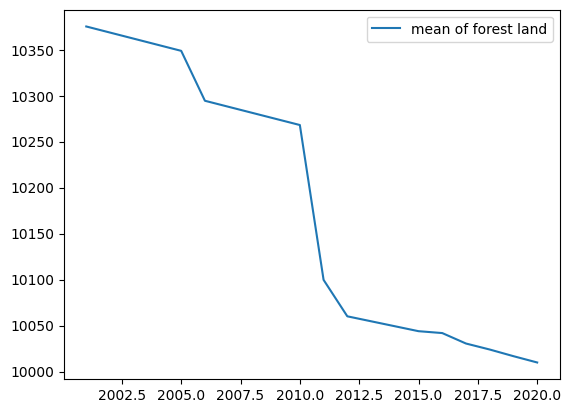

In [396]:
df = pd.DataFrame({
   'mean of forest land': meanfarray
   }, index=years)
lines = df.plot.line()

Clearly visible that the mean of total forest land in decreasing over the years

# RedList Data

#REDLIST DATA

The Red List Index measures change in aggregate extinction risk across groups of species
The dataset contains the red list index number for 240 countries from 2001 to 2021. The Red List Index value ranges from 1 (all species are categorized as ‘Least Concern') to 0 (all species are categorized as ‘Extinct'), and so indicates how far the set of species has moved overall towards extinction.

In [28]:
red_list = pd.read_csv('RED_LIST.csv')
print(red_list.head())

   COU Country    VAR Variable - Red List   YEA  Year  Value  Flag Codes  \
0  WLD   World  INDEX      Red List Index  2001  2001  0.794         NaN   
1  WLD   World  INDEX      Red List Index  2002  2002  0.791         NaN   
2  WLD   World  INDEX      Red List Index  2003  2003  0.787         NaN   
3  WLD   World  INDEX      Red List Index  2004  2004  0.784         NaN   
4  WLD   World  INDEX      Red List Index  2005  2005  0.781         NaN   

   Flags  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  


In [29]:
print(red_list["Year"].unique())
print("number of unique ICUN, year: ", red_list["Year"].nunique())
print("number of unique ICUN, country: ", red_list["Country"].nunique())

[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021]
number of unique ICUN, year:  21
number of unique ICUN, country:  240


In [134]:
#dropping unnecessary columns
red_list_new=red_list.drop(columns = ["Flag Codes","Flags" ])
red_list_new.head()

,COU,Country,VAR,Variable - Red List,YEA,Year,Value
0,WLD,World,INDEX,Red List Index,2001,2001,0.794
1,WLD,World,INDEX,Red List Index,2002,2002,0.791
2,WLD,World,INDEX,Red List Index,2003,2003,0.787
3,WLD,World,INDEX,Red List Index,2004,2004,0.784
4,WLD,World,INDEX,Red List Index,2005,2005,0.781


In [135]:
# to check if there is any missing value in a column
red_list_new.isnull().Value.any()
#red_list.isnull().Year.any()

False

It shows this dataset doesnot have any missing value(not even the main dataset)

In [278]:
#to check if there is any duplicate value exist; output shows none
red_list_new.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15115    False
15116    False
15117    False
15118    False
15119    False
Length: 15120, dtype: bool

#Mean

In [140]:
#filtering through columns and rows
red_listn=red_list_new[red_list_new["Year"]==2001]
red_list1=red_listn[red_listn["VAR"]=="INDEX"]
red_list1.head()

,COU,Country,VAR,Variable - Red List,YEA,Year,Value
0,WLD,World,INDEX,Red List Index,2001,2001,0.794
63,LIE,Liechtenstein,INDEX,Red List Index,2001,2001,0.991
147,WSM,Samoa,INDEX,Red List Index,2001,2001,0.784
189,ASM,American Samoa,INDEX,Red List Index,2001,2001,0.869
231,LUX,Luxembourg,INDEX,Red List Index,2001,2001,0.983


In [158]:
#the mean of the red list index around the world
print("the mean of the red list index for year 2001: ", red_list1["Value"].mean())

the mean of the red list index for year 2001:  0.8644208333333334


In [159]:
#filtering through columns and rows
red_listn=red_list_new[red_list_new["Year"]==2020]
red_list2=red_listn[red_listn["VAR"]=="INDEX"]
red_list2.head()

,COU,Country,VAR,Variable - Red List,YEA,Year,Value
19,WLD,World,INDEX,Red List Index,2020,2020,0.729
82,LIE,Liechtenstein,INDEX,Red List Index,2020,2020,0.991
166,WSM,Samoa,INDEX,Red List Index,2020,2020,0.762
208,ASM,American Samoa,INDEX,Red List Index,2020,2020,0.863
250,LUX,Luxembourg,INDEX,Red List Index,2020,2020,0.985


In [160]:
#the mean of the red list index around the world
print("the mean of the red list index for year 2020: ", red_list2["Value"].mean())

the mean of the red list index for year 2020:  0.8389291666666667


Here we can see that there is not much significant difference between the mean of the red list index in 2001 and 2020.

In [398]:
#to get the mean of redlist index for all the years
years=[2001,2002,2003,2004, 2005, 2006, 2007, 2008, 2009 ,2010, 2011, 2012, 2013, 2014,2015, 2016 ,2017, 2018, 2019, 2020]
meanarray=[]
for i in years:
    redmean4=red_list_new.loc[red_list_new['Year'] == i, 'Value'].mean()
    meanarray.append(redmean4)
#print(meanarray)

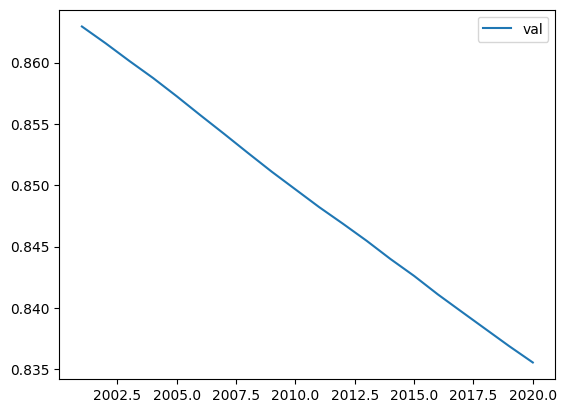

In [399]:
df = pd.DataFrame({
   'val': meanarray
   }, index=years)
lines = df.plot.line()

the mean of the redlist index is decreasing overthe year. according to the redlist, the more the value is close to 0, the more likely the species is to extinc. therefore, we can say that the probability for the species to extinc is increasing

# For Wildlife Data

FOR WILDLIFE DATA

Threatened species as % of known species. 
Species assessed as Critically Endangered (CR), Endangered (EN), or Vulnerable (VU) are referred to as "threatened" species. 

In [30]:
wild_life = pd.read_csv('WILD_LIFE.csv')
print(wild_life.head())

            IUCN                             IUCN Category    SPEC  Species  \
0      TOT_KNOWN             Total number of known species  MAMMAL  Mammals   
1  TOT_KNOWN_IND  Total number of indigenous known species  MAMMAL  Mammals   
2     ENDANGERED              Number of endangered species  MAMMAL  Mammals   
3       CRITICAL   Number of critically endangered species  MAMMAL  Mammals   
4     VULNERABLE              Number of vulnerable species  MAMMAL  Mammals   

   COU    Country Unit Code    Unit  PowerCode Code PowerCode  \
0  AUS  Australia       NBR  Number               0     Units   
1  AUS  Australia       NBR  Number               0     Units   
2  AUS  Australia       NBR  Number               0     Units   
3  AUS  Australia       NBR  Number               0     Units   
4  AUS  Australia       NBR  Number               0     Units   

   Reference Period Code  Reference Period  Value Flag Codes Flags  
0                    NaN               NaN  377.0        NaN   Na

In [124]:
print(wild_life["IUCN Category"].unique())
print("number of unique ICUN: ", wild_life["IUCN"].nunique())
print(wild_life["IUCN"].unique())
print(wild_life["Species"].unique())
print("number of unique ICUN, species: ", wild_life["Species"].nunique())
print("number of unique ICUN, country ", wild_life["Country"].nunique())

['Total number of known species'
 'Total number of indigenous known species' 'Number of endangered species'
 'Number of critically endangered species' 'Number of vulnerable species'
 'Total number of threatened species'
 'Number of endangered indigenous species'
 'Number of critically endangered indigenous species'
 'Number of vulnerable indigenous species'
 'Threatened species as % of known species'
 'Total number of indigenous threatened species'
 'Threatened indigenous species as % of indigenous spec.']
number of unique ICUN:  12
['TOT_KNOWN' 'TOT_KNOWN_IND' 'ENDANGERED' 'CRITICAL' 'VULNERABLE'
 'THREATENED' 'ENDANGERED_IND' 'CRITICAL_IND' 'VULNERABLE_IND'
 'THREAT_PERCENT' 'THREATENED_IND' 'IND_PERCENT']
['Mammals' 'Birds' 'Reptiles' 'Amphibians' 'Vascular plants' 'Fish'
 'Marine Fish' 'Freshwater Fish' 'Mosses' 'Lichens' 'Invertebrates']
number of unique ICUN, species:  11
number of unique ICUN, country  39


DATA PREPROCESSING FOR WILD_LIFE

In [245]:
#dropping unnecessary columns
wild_life_new=wild_life.drop(columns = ["PowerCode Code", "Reference Period", "Reference Period Code", "Flag Codes","Flags" ])
wild_life_new.head()

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode,Value
0,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,Units,377.0
1,TOT_KNOWN_IND,Total number of indigenous known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,Units,352.0
2,ENDANGERED,Number of endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,Units,41.0
3,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,Units,9.0
4,VULNERABLE,Number of vulnerable species,MAMMAL,Mammals,AUS,Australia,NBR,Number,Units,57.0


In [90]:
# to check if there is any missing value in a column
wild_life_new.isnull().head()
#wild_life.isnull().Value.any()

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode,Value
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


It shows there is no null values. However, while downloading it didnot downloded the rows which does not have values. therefore, for example is there is no value for the threathened mammals in france, that row in not there. The rows are automatically dropped. 
So, we can say the missing value problem is being solved here by dropping thr entries. 

In [145]:
#to check if there is any duplicate value exist; output shows none
wild_life_new.duplicated()
#wild_life_new

0       False
1       False
2       False
3       False
4       False
        ...  
3626    False
3627    False
3628    False
3629    False
3630    False
Length: 3631, dtype: bool

In [92]:
wild_life_new.Value.describe()

count      3631.000000
mean        498.453870
std        3582.194685
min           0.000000
25%           6.000000
50%          23.267000
75%          90.000000
max      114940.000000
Name: Value, dtype: float64

In [146]:
#filtering through columns and rows
wild_totknown=wild_life_new[wild_life_new["IUCN"]=="TOT_KNOWN"]
#wild_totknownmammal = wild_totknown[wild_totknown['Country']=="Australia"]
wild_totknown.head()

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode,Value
0,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,Units,377.0
6,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,AUT,Austria,NBR,Number,Units,104.0
15,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,BEL,Belgium,NBR,Number,Units,84.0
24,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,CAN,Canada,NBR,Number,Units,222.0
31,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,CZE,Czech Republic,NBR,Number,Units,92.0


In [224]:
#the mean of the total number of known species around the world
wmean=wild_totknown["Value"].mean()
print("the mean of the total number of known species: ",wmean )

the mean of the total number of known species:  2881.6796657381615


In [148]:
#filtering through columns and rows
wild_endan=wild_life_new[wild_life_new["IUCN"]=="ENDANGERED"]
#wild_totknownmammal = wild_totknown[wild_totknown['Country']=="Australia"]
wild_endan.head()

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode,Value
2,ENDANGERED,Number of endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,Units,41.0
8,ENDANGERED,Number of endangered species,MAMMAL,Mammals,AUT,Austria,NBR,Number,Units,6.0
17,ENDANGERED,Number of endangered species,MAMMAL,Mammals,BEL,Belgium,NBR,Number,Units,2.0
26,ENDANGERED,Number of endangered species,MAMMAL,Mammals,CAN,Canada,NBR,Number,Units,11.0
33,ENDANGERED,Number of endangered species,MAMMAL,Mammals,CZE,Czech Republic,NBR,Number,Units,1.0


In [225]:
#the mean of the total number of endangered species around the world
wmean1= wild_endan["Value"].mean()
print("the mean of the total number of endangered species: ",wmean1 )

the mean of the total number of endangered species:  57.09567901234568


In [150]:
#filtering through columns and rows
wild_criendan=wild_life_new[wild_life_new["IUCN"]=="CRITICAL"]
wild_criendan.head()

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode,Value
3,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,Units,9.0
9,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,AUT,Austria,NBR,Number,Units,4.0
18,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,BEL,Belgium,NBR,Number,Units,4.0
34,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,CZE,Czech Republic,NBR,Number,Units,10.0
40,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,DNK,Denmark,NBR,Number,Units,1.0


In [223]:
#the mean of the total number of critically endangered species around the world
wmean2=wild_criendan["Value"].mean()
print("the mean of the total number of critically endangered species: ",wmean2 )

the mean of the total number of critically endangered species:  39.726072607260726


In [153]:
#filtering through columns and rows
wild_vuln=wild_life_new[wild_life_new["IUCN"]=="VULNERABLE"]
wild_vuln.head()

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode,Value
4,VULNERABLE,Number of vulnerable species,MAMMAL,Mammals,AUS,Australia,NBR,Number,Units,57.0
10,VULNERABLE,Number of vulnerable species,MAMMAL,Mammals,AUT,Austria,NBR,Number,Units,17.0
19,VULNERABLE,Number of vulnerable species,MAMMAL,Mammals,BEL,Belgium,NBR,Number,Units,12.0
27,VULNERABLE,Number of vulnerable species,MAMMAL,Mammals,CAN,Canada,NBR,Number,Units,33.0
35,VULNERABLE,Number of vulnerable species,MAMMAL,Mammals,CZE,Czech Republic,NBR,Number,Units,4.0


In [219]:
#the mean of the total number of vulnerable species around the world
wmean3=wild_vuln["Value"].mean()
print("the mean of the total number of vulnerable species: ",wmean3 )

the mean of the total number of vulnerable species:  85.00911854103343


In [155]:
#filtering through columns and rows
wild_thn=wild_life_new[wild_life_new["IUCN"]=="THREATENED"]
wild_thn.head()

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode,Value
5,THREATENED,Total number of threatened species,MAMMAL,Mammals,AUS,Australia,NBR,Number,Units,107.0
11,THREATENED,Total number of threatened species,MAMMAL,Mammals,AUT,Austria,NBR,Number,Units,27.0
20,THREATENED,Total number of threatened species,MAMMAL,Mammals,BEL,Belgium,NBR,Number,Units,18.0
28,THREATENED,Total number of threatened species,MAMMAL,Mammals,CAN,Canada,NBR,Number,Units,55.0
36,THREATENED,Total number of threatened species,MAMMAL,Mammals,CZE,Czech Republic,NBR,Number,Units,15.0


In [217]:
#the mean of the total number of threatened species around the world
wmean4= wild_thn["Value"].mean()
print("the mean of the total number of threatened species: ", wmean4)

the mean of the total number of threatened species:  170.16239316239316


So, we can see that, the mean of total species is 2881.679666, endangered species 57.095679, critically endangered 39.726073, vulnerable 85.009119 and threatened species is 170.162393.
So the mean of vulnerable species throughout the world is higher than the endangered or critically endangered species. 

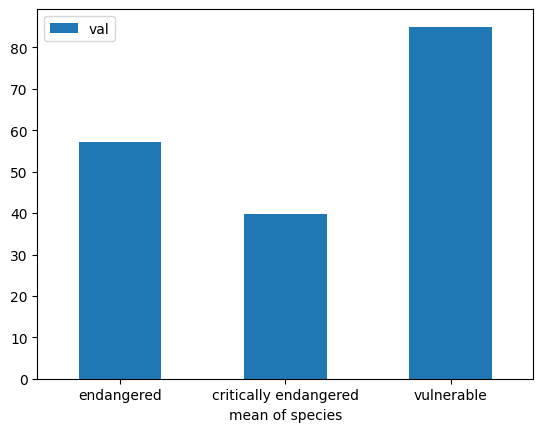

In [231]:
df = pd.DataFrame({'mean of species':['endangered','critically endangered', 'vulnerable'], 'val':[wmean1,wmean2,wmean3]})
ax = df.plot.bar(x='mean of species', y='val', rot=0)

There is a bar charts deficting that among the species that are marked as "threatenend", most of them fall into the "vulnerable" category

In [253]:
#filtering through columns and rows
wild_lifetp=wild_life_new[wild_life_new["IUCN"]=="TOT_KNOWN"]
array =['Mammals', 'Birds', 'Reptiles' ,'Amphibians' ,'Vascular plants' ,'Fish','Marine Fish', 'Freshwater Fish', 'Mosses', 'Lichens', 'Invertebrates']
wild_life_tknown=wild_lifetp.loc[wild_lifetp['Species'].isin(array)]
wild_life_tknown.head()

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode,Value
0,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,Units,377.0
6,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,AUT,Austria,NBR,Number,Units,104.0
15,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,BEL,Belgium,NBR,Number,Units,84.0
24,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,CAN,Canada,NBR,Number,Units,222.0
31,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,CZE,Czech Republic,NBR,Number,Units,92.0


In [259]:
#getting the means of total known species based on specific species
tknown_mammals=wild_life_tknown.loc[wild_life_tknown['Species'] == 'Mammals', 'Value'].mean()
tknown_birds=wild_life_tknown.loc[wild_life_tknown['Species'] == 'Birds', 'Value'].mean()
tknown_reptiles=wild_life_tknown.loc[wild_life_tknown['Species'] == 'Reptiles', 'Value'].mean()
tknown_amphi=wild_life_tknown.loc[wild_life_tknown['Species'] == 'Amphibians', 'Value'].mean()
#tknown_interv=wild_life_tknown.loc[wild_life_tknown['Species'] == 'Invertebrates', 'Value'].mean()

In [260]:
wild_life_totalth=wild_life_new[wild_life_new["IUCN"]=="THREATENED"]

In [261]:
#getting the means of total threathen species based on specific species
tthn_mammals=wild_life_totalth.loc[wild_life_totalth['Species'] == 'Mammals', 'Value'].mean()
tthn_birds=wild_life_totalth.loc[wild_life_totalth['Species'] == 'Birds', 'Value'].mean()
tthn_reptiles=wild_life_totalth.loc[wild_life_totalth['Species'] == 'Reptiles', 'Value'].mean()
tthn_amphi=wild_life_totalth.loc[wild_life_totalth['Species'] == 'Amphibians', 'Value'].mean()
#tthn_interv=wild_life_totalth.loc[wild_life_totalth['Species'] == 'Invertebrates', 'Value'].mean()

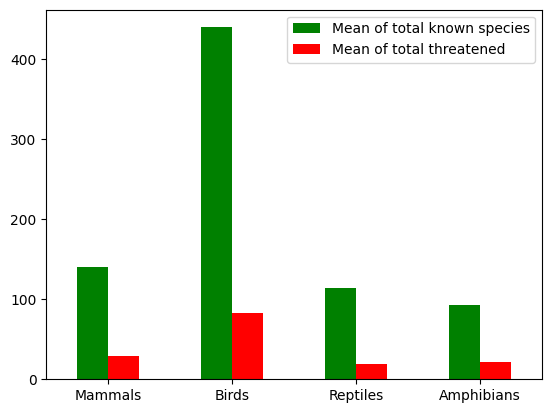

In [267]:
known = [tknown_mammals,tknown_birds, tknown_reptiles, tknown_amphi]
threatened = [tthn_mammals, tthn_birds, tthn_reptiles, tthn_amphi]
index = ['Mammals', 'Birds', 'Reptiles',
         'Amphibians']
df = pd.DataFrame({'Mean of total known species': known,
                   'Mean of total threatened': threatened}, index=index)
ax = df.plot.bar(rot=0, color={"Mean of total known species": "green", "Mean of total threatened": "red"})

So, comparing the total known species, birds have less percentage of threatened species. 

LEVEL 2
T-TEST

The mean of redlist animal is equal to the threathened species?
or
the red list index of 2002 is equal 2020? 

QUESTION: Is there any significant difference between the trend of redlist index of species from 2001 to 2020?

In [285]:
redlist1 = red_list_new[red_list_new['Year']==2001]['Value']
redlist2= red_list_new[red_list_new['Year']==2020]['Value']
stats.ttest_ind(redlist1, redlist2)

Ttest_indResult(statistic=4.845722343257664, pvalue=1.3980938313135415e-06)

choosing two-tail test:
Null hypothesis: redlist index of 2001 == redlist index of 2020
Alt hypothesis: redlist index of 2001 != redlist index of 2020

according to the t-test, t-value = 4.846
                         p-value = 1.398

the distribution:
confidence level 95% or alpha value 0.05
it is a two-tailed test, so alpha/2 = 0.05/2=0.025

the p-value 1.39 > alpha/2=0.025
therefore, the null hypothesis is accepted. So, it can be said that there is no significant difference between the trend of redlist index in the year of 2001 and 2020. 

QUESTION 2: is there any simmilaries between the trend of forestland and redlist index?

In [400]:
stats.ttest_ind(meanarray, meanfarray)

Ttest_indResult(statistic=-309.50402598977865, pvalue=2.9961901321963116e-66)

choosing two-tail test: Null hypothesis: mean of forest land trend == mean of redlist index; Alt hypothesis: mean of forest land trend != mean of redlist index

according to the t-test, t-value = -309.504 p-value = 2.996

the distribution: confidence level 95% or alpha value 0.05 it is a two-tailed test, so alpha/2 = 0.05/2=0.025

the p-value 2.996 > alpha/2=0.025 therefore, the null hypothesis is accepted. So, there are simmilarities between the mean of forest land trend and mean of redlist index